In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%run ../modules/utils.ipynb

In [134]:
df_noad = pd.read_excel('~/Downloads/total_tRNA_20to40_no_ad_25k.xlsx')
df_ad = pd.read_excel('~/Downloads/total_tRNA_20to40_ad_25k.xlsx')
# df_noad = pd.read_excel('~/Downloads/total_tRNA_sample3_no_ad_25k.xlsx')
# df_ad = pd.read_excel('~/Downloads/total_tRNA_sample4_ad_25k.xlsx')

In [135]:
df_noad['Remain'] = df_noad['Remain'].astype(bool)
df_ad['Remain'] = df_ad['Remain'].astype(bool)

In [18]:
df_common = df_noad[df_noad.Remain == True]

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

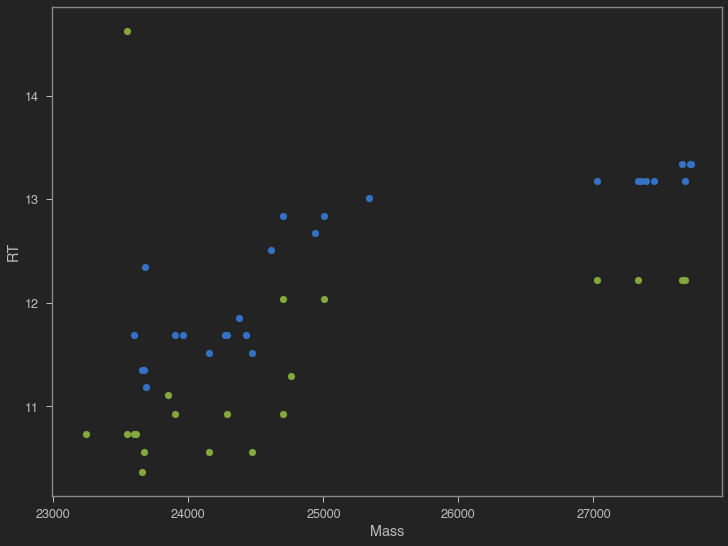

In [132]:
plot_zones(df_noad, df_common)

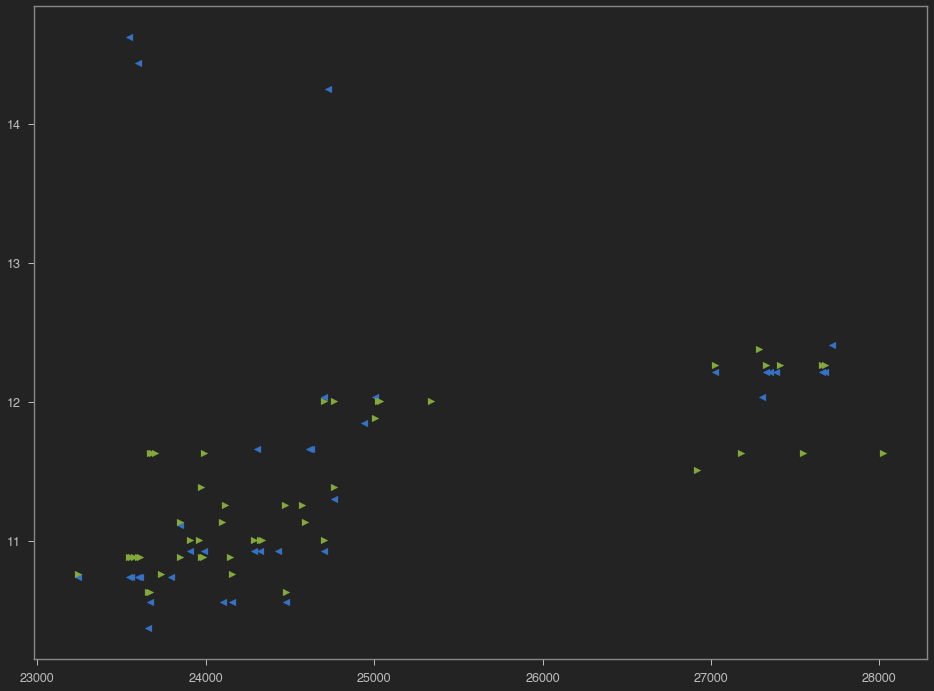

In [136]:
plt.figure(figsize=(16, 12))
plt.scatter(df_noad.Mass, df_noad.RT, color='b', marker='<')
plt.scatter(df_ad.Mass, df_ad.RT, color='g', marker='>')
# plt.scatter(df_common.Mass, df_common.RT, color='r', marker='2')

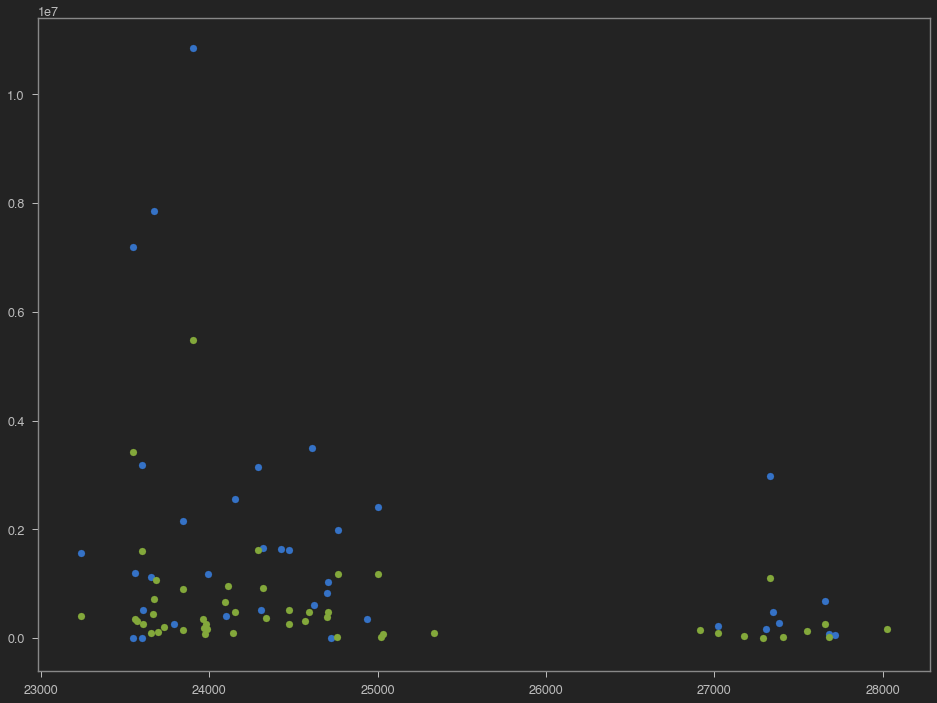

In [125]:
plt.figure(figsize=(16, 12))
plt.scatter(df_noad.Mass, df_noad.Vol, color='b')
plt.scatter(df_ad.Mass, df_ad.Vol, color='g')
# plt.scatter(df_common.Mass, df_common.Vol, color='r')

In [23]:
df_noad_only = df_noad[df_noad.Remain == False]
df_ad_only = df_ad[df_ad.Remain == False]

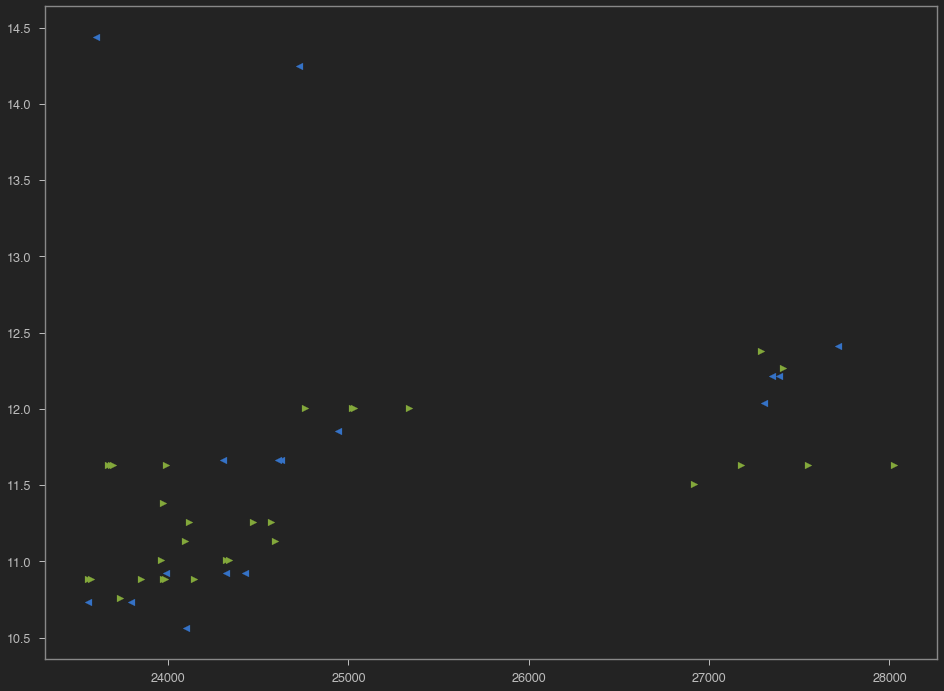

In [39]:
# plot_zones(df_noad_only, df_ad_only)
plt.figure(figsize=(16, 12))
plt.scatter(df_noad_only.Mass, df_noad_only.RT, color='b', marker='<')
plt.scatter(df_ad_only.Mass, df_ad_only.RT, color='g', marker='>')

In [45]:
df_noad_only['stage'] = 'noad'
df_ad_only['stage'] = 'ad'
df_union = pd.concat([df_noad_only, df_ad_only])
df_union.shape

(46, 6)

In [49]:
df_union.tail()

,Unnamed: 0,Mass,RT,Vol,Remain,stage
36,178,23696.233710,11.635146,114401.93,False,ad
7,7,23682.236745,11.635146,1072091.35,False,ad
17,26,23668.197652,11.635146,442146.66,False,ad
24,45,23571.176124,10.882913,305940.15,False,ad
22,38,23558.153635,10.882913,345468.93,False,ad


In [137]:
import plotly.graph_objects as go

fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_noad_only.Mass, y=df_noad_only.RT, mode='markers', name='no_ad'))
# fig.add_trace(go.Scatter(x=df_ad_only.Mass, y=df_ad_only.RT, mode='markers', name='ad'))
fig.add_trace(go.Scatter(x=df_noad.Mass, y=df_noad.RT, mode='markers', name='no_ad'))
fig.add_trace(go.Scatter(x=df_ad.Mass, y=df_ad.RT, mode='markers', name='ad'))

fig.update_xaxes(nticks=20)
# fig.show()
f = go.FigureWidget(fig)
f.update_layout(autosize=False, width=1024, height=700,
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ))

FigureWidget({
    'data': [{'mode': 'markers',
              'name': 'no_ad',
              'type': 'scatter'…

In [52]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_draw = df_union 
x = df_draw.Mass
y = df_draw.Vol
fig = go.Scatter(x=x, y=y, mode='markers')
f = go.FigureWidget(fig)
f.update_layout(autosize=False, width=1024, height=700, paper_bgcolor="LightSteelBlue",
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ))
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': 'e08c55e…

In [61]:
df_noad_only = df_noad_only.sort_values('Mass', ascending=False)
df_ad_only = df_ad_only.sort_values('Mass', ascending=False)

In [62]:
df_noad_only, df_ad_only

(    Unnamed: 0          Mass         RT         Vol  Remain stage
 32          33  27716.701443  12.409472    52346.70   False  noad
 27          27  27386.666553  12.217769   281897.18   False  noad
 24          24  27349.751914  12.217769   480502.19   False  noad
 30          30  27305.760840  12.036941   158782.13   False  noad
 26          26  24939.515536  11.851697   347778.18   False  noad
 34         107  24723.437800  14.251079     1462.89   False  noad
 21          21  24625.465389  11.664014   601938.14   False  noad
 3            3  24610.485283  11.664014  3493439.56   False  noad
 12          12  24428.380969  10.925018  1642402.78   False  noad
 11          11  24321.325819  10.925018  1661355.79   False  noad
 22          22  24305.423047  11.664014   526051.62   False  noad
 25          25  24099.292945  10.560491   408136.13   False  noad
 16          16  23991.232875  10.925018  1180597.08   False  noad
 28          28  23792.208695  10.736368   267196.36   False  

In [138]:
noad = np.array(df_noad.Mass)
ad = np.array(df_ad.Mass)

In [139]:
diff = noad[:, np.newaxis] - ad

In [140]:
df_diff = pd.DataFrame(diff)

In [141]:
# df_diff = df_diff[(df_diff > 0) & (df_diff < 500)]
df_diff = df_diff[df_diff > 0]
df_diff

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,3812.465013,4171.533616,3429.337149,4117.523124,2711.162708,2953.201007,387.967044,4034.464698,3602.372731,3394.346328,...,2382.067004,693.001558,3744.460235,2684.151155,538.978467,37.88918,2956.169601,305.981153,2694.154575,429.932410
1,3774.560962,4133.629564,3391.433098,4079.619072,2673.258657,2915.296956,350.062993,3996.560647,3564.468680,3356.442277,...,2344.162953,655.097507,3706.556184,2646.247104,501.074416,NaN,2918.265550,268.077102,2656.250524,392.028359
2,3753.525838,4112.594440,3370.397974,4058.583948,2652.223533,2894.261832,329.027869,3975.525523,3543.433556,3335.407153,...,2323.127829,634.062383,3685.521060,2625.211980,480.039292,NaN,2897.230426,247.041978,2635.215400,370.993235
3,3482.430123,3841.498726,3099.302259,3787.488234,2381.127818,2623.166117,57.932154,3704.429808,3272.337842,3064.311438,...,2052.032114,362.966669,3414.425345,2354.116265,208.943577,NaN,2626.134712,NaN,2364.119686,99.897520
4,3445.515484,3804.584086,3062.387620,3750.573594,2344.213179,2586.251478,21.017515,3667.515169,3235.423202,3027.396799,...,2015.117475,326.052029,3377.510706,2317.201626,172.028938,NaN,2589.220072,NaN,2327.205046,62.982881
5,3424.498369,3783.566972,3041.370505,3729.556480,2323.196064,2565.234363,0.000400,3646.498054,3214.406088,3006.379684,...,1994.100360,305.034915,3356.493592,2296.184511,151.011824,NaN,2568.202958,NaN,2306.187932,41.965766
6,3401.524410,3760.593012,3018.396546,3706.582520,2300.222105,2542.260404,NaN,3623.524095,3191.432128,2983.405725,...,1971.126401,282.060955,3333.519632,2273.210552,128.037864,NaN,2545.228998,NaN,2283.213972,18.991807
7,3119.444909,3478.513511,2736.317045,3424.503019,2018.142603,2260.180903,NaN,3341.444593,2909.352627,2701.326224,...,1689.046899,NaN,3051.440131,1991.131051,NaN,NaN,2263.149497,NaN,2001.134471,NaN
8,1101.289947,1460.358549,718.162083,1406.348057,NaN,242.025941,NaN,1323.289632,891.197665,683.171262,...,NaN,NaN,1033.285169,NaN,NaN,NaN,244.994535,NaN,NaN,NaN
9,1035.279106,1394.347709,652.151242,1340.337217,NaN,176.015100,NaN,1257.278791,825.186825,617.160421,...,NaN,NaN,967.274328,NaN,NaN,NaN,178.983694,NaN,NaN,NaN


In [142]:
df_diff[df_diff.notnull()].stack()

0   0     3812.465013
    1     4171.533616
    2     3429.337149
    3     4117.523124
    4     2711.162708
    5     2953.201007
    6      387.967044
    7     4034.464698
    8     3602.372731
    9     3394.346328
    10    3870.487622
    11    4045.483485
    12    3620.381606
    13    3244.282198
    14    3012.246815
    15    3561.356026
    16    3126.281634
    17    4048.503791
    18    4475.540933
    19    3016.179354
    20    3381.361567
    21    3755.483595
    22    4158.547808
    23    3146.376556
    24    4145.525319
    25    4107.508771
    26    3735.457046
    27    3242.370864
    28      58.962789
    29    3985.485238
             ...     
27  17       2.952178
    18     429.989320
    22     112.996195
    24      99.973707
    25      61.957158
    38      13.960666
28  1      111.972447
    3       57.961955
    18     415.979764
    22      98.986639
    24      85.964150
    25      47.947602
29  1       63.993745
    3        9.983253
    18    

In [143]:
idx_pairs = list(df_diff[df_diff.notnull()].stack().index)
idx_pairs

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7)

In [72]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
diff

array([[ -306.15,   167.93,   305.98,   429.93,   538.98,   801.99,
         2382.07,  2684.15,  2694.15,  2956.17,  3126.28,  3146.38,
         3244.28,  3381.36,  3394.35,  3572.37,  3602.37,  3620.38,
         3729.44,  3735.46,  3744.46,  3746.49,  3755.48,  3869.49,
         3985.49,  4020.47,  4034.46,  4048.5 ,  4145.53,  4158.55],
       [ -636.18,  -162.11,   -24.05,    99.9 ,   208.94,   471.95,
         2052.03,  2354.12,  2364.12,  2626.13,  2796.25,  2816.34,
         2914.25,  3051.33,  3064.31,  3242.34,  3272.34,  3290.35,
         3399.4 ,  3405.42,  3414.43,  3416.45,  3425.45,  3539.46,
         3655.45,  3690.43,  3704.43,  3718.47,  3815.49,  3828.51],
       [ -673.1 ,  -199.02,   -60.97,    62.98,   172.03,   435.04,
         2015.12,  2317.2 ,  2327.21,  2589.22,  2759.33,  2779.43,
         2877.33,  3014.41,  3027.4 ,  3205.42,  3235.42,  3253.43,
         3362.49,  3368.51,  3377.51,  3379.54,  3388.53,  3502.54,
         3618.54,  3653.52,  3667.52,  3681.55

In [79]:

mask = diff > 0
diff_positive = np.ma.masked_where((diff<0) | (diff > 500), diff)
np.set_printoptions(precision=2)
diff_positive

masked_array(
  data=[[--, 167.92678074019932, 305.98115345849874, 429.93240989440164,
         --, --, --, --, --, --, --, --, --, --, --, --, --, --, --, --,
         --, --, --, --, --, --, --, --, --, --],
        [--, --, --, 99.89752016240163, 208.94357749780102,
         471.9508220743992, --, --, --, --, --, --, --, --, --, --, --,
         --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, 62.982880832700175, 172.02893816809956,
         435.0361827446977, --, --, --, --, --, --, --, --, --, --, --,
         --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, 18.991806874902977, 128.03786421030236,
         391.0451087869005, --, --, --, --, --, --, --, --, --, --, --,
         --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, 178.9836943970986,
         349.09572669529734, 369.19064891529706, 467.0962906044988, --,
         --, --, --, --, --, --, --, --, --, --, --, --, --, --, --, -

In [81]:
diff_positive_nan = np.ma.filled(diff_positive.astype(float), np.nan)

In [82]:
diff_positive_nan

array([[   nan, 167.93, 305.98, 429.93,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,  99.9 , 208.94, 471.95,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,  62.98, 172.03, 435.04,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,  18.99, 128.04, 391.05,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    na

In [144]:
# diff_series = pd.Series(diff[(diff>0) & (diff<500)])
diff_series = pd.Series(diff[diff>0])
diff_series.shape

(882,)

In [91]:
diff_series.sort_values()#.to_excel('~/Downloads/diff_series.xlsx')

62      2.973107
73      3.970500
74      9.988478
75     18.991667
9      18.991807
27     20.065474
76     21.018990
91     28.925298
77     30.015027
21     35.045580
28     40.160396
92     41.947787
22     55.140502
85     60.992490
6      62.982881
34     93.041093
86     95.974985
3      99.897520
35    106.025854
87    109.971950
63    112.030570
64    118.048548
88    124.011042
65    127.051737
10    128.037864
66    129.079060
16    133.017991
29    138.066038
67    138.075097
78    144.023898
         ...    
48    340.081422
60    344.205199
49    349.084612
13    349.095727
50    351.111935
51    360.107972
69    368.076740
14    369.190649
19    388.097924
11    391.045109
20    401.082685
70    403.059235
71    417.056200
83    420.056751
2     429.932410
72    431.095292
84    433.079240
8     435.036183
39    441.118595
40    447.136572
41    456.139762
42    458.167085
61    458.214071
32    466.154302
15    467.096291
43    467.163121
5     471.950822
52    474.1168

In [89]:
diff_series

0     167.926781
1     305.981153
2     429.932410
3      99.897520
4     208.943577
5     471.950822
6      62.982881
7     172.028938
8     435.036183
9      18.991807
10    128.037864
11    391.045109
12    178.983694
13    349.095727
14    369.190649
15    467.096291
16    133.017991
17    153.112913
18    251.018555
19    388.097924
20    401.082685
21     35.045580
22     55.140502
23    153.046144
24    290.125513
25    303.110274
26    481.134408
27     20.065474
28     40.160396
29    138.066038
         ...    
63    112.030570
64    118.048548
65    127.051737
66    129.079060
67    138.075097
68    252.083968
69    368.076740
70    403.059235
71    417.056200
72    431.095292
73      3.970500
74      9.988478
75     18.991667
76     21.018990
77     30.015027
78    144.023898
79    260.016670
80    294.999165
81    308.996130
82    323.035222
83    420.056751
84    433.079240
85     60.992490
86     95.974985
87    109.971950
88    124.011042
89    221.032571
90    234.0550

In [145]:
idxs_diff = list(zip(idx_pairs, diff_series))

In [146]:
idxs_diff[:3]

[((0, 0), 3812.465012926299),
 ((0, 1), 4171.533615507502),
 ((0, 2), 3429.3371489364)]

In [147]:
masses_diff = [(noad[item[0][0]], ad[item[0][1]], item[1]) for item in idxs_diff]
masses_diff[:3]

[(27716.7014426979, 23904.2364297716, 3812.465012926299),
 (27716.7014426979, 23545.1678271904, 4171.533615507502),
 (27716.7014426979, 24287.3642937615, 3429.3371489364)]

In [120]:
df_masses_diff = pd.DataFrame(masses_diff)
df_masses_diff.head()

,0,1,2
0,27716.701443,27548.774662,167.926781
1,27716.701443,27410.720289,305.981153
2,27716.701443,27286.769033,429.932410
3,27716.701443,27177.722975,538.978467
4,27716.701443,26914.715731,801.985712


In [121]:
df_masses_diff.to_excel('~/Downloads/total_25k_diffs.xlsx')